# Which keys are pressed?
- How to find what keys are pressed when we enter a phone-number on a telephone, based on the audio of the pressed keys
- the answer will be provided throw this jupyter notebook
- Ali Asad 9831004 @AUT

# Importing usefull libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Plotting Signals

In [2]:
def plot_ct_signal(t, x_t, x_label='Time [s]', y_label='Signal'):
    plt.grid(ls='--')
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    plt.plot(t, x_t, c='tab:blue')
    plt.rcParams["figure.figsize"] = (15, 10)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    pass

In [3]:
def plot_dt_signal(n, x_n, x_label='Frequency [hz]', y_label='Fourier Series Coefficients'):
    plt.grid(ls='--')
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    plt.rcParams["figure.figsize"] = (15, 10)
    
    input_size = len(n)
    for i in range(input_size):
        plt.plot([n[i], n[i]], [0, x_n[i]], c='tab:blue')
    plt.scatter(n, x_n, c='tab:blue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    pass

# Reading audio signal from file

In [4]:
sample_rate, data = wavfile.read('tone.wav')
sample_step = 1. / sample_rate
length = data.shape[0] / sample_rate

In [5]:
t = (np.arange(0, length , step=sample_step))
x_t = data

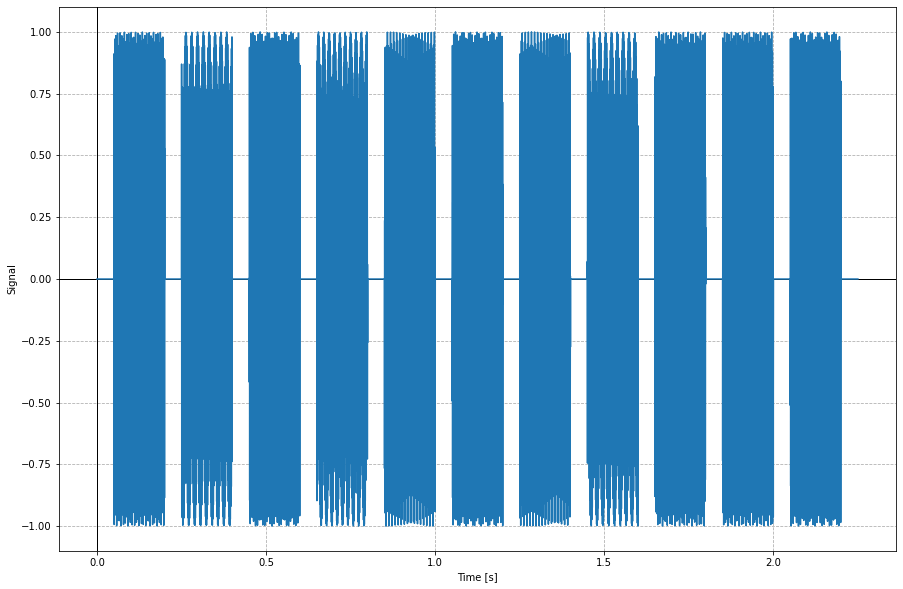

In [17]:
plot_ct_signal(t,x_t)

## Transfering x_t into X_jw

In [7]:
def freq_domain_transfer(x_t, normalized=False):
    freq = np.fft.fftfreq(x_t.shape[-1], d=sample_step)
    amplitude = np.fft.fft(x_t)
    if normalized:
        amplitude_normalized =  2./len(x_t) * np.abs(amplitude)
        return freq, amplitude_normalized
    return freq, amplitude

In [8]:
freq, amplitude = freq_domain_transfer(x_t, normalized=True)

## Remove all X_jw that their frequencies are above 2000 and below 0

In [9]:
a = [i for i,v in enumerate(freq) if (v > 0) and (v < 2000)] # we only need frequencies between 0 to 2000
freq = [freq[i] for i in a]
amplitude = [amplitude[i] for i in a]

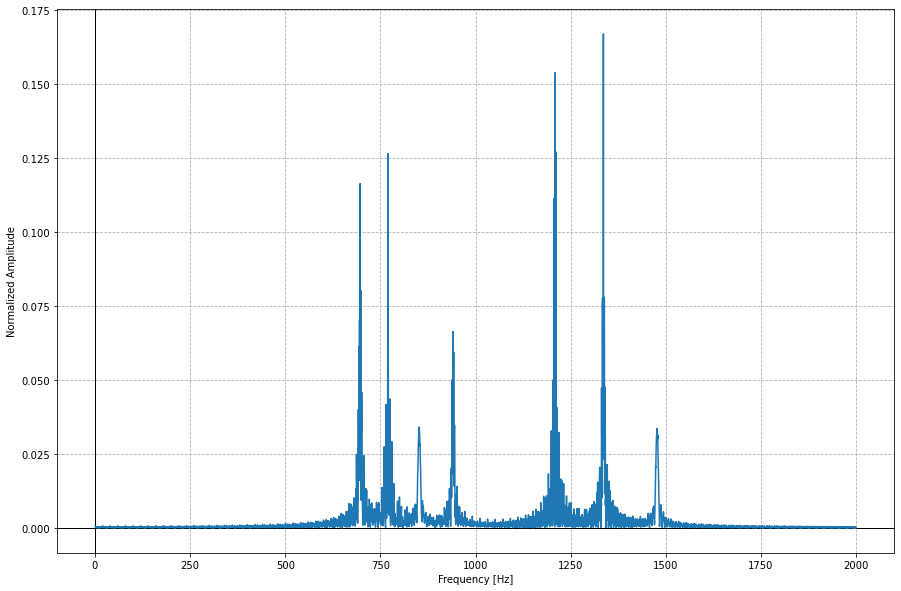

In [10]:
plot_ct_signal(freq,amplitude,x_label='Frequency [Hz]', y_label='Normalized Amplitude')

# Ploting spectrongram of the audio signal

## 1. Change signal's audio data into a 2D matrix

In [11]:
def get_reshaped_signal(data, window_size=2048):
    rows = data.shape[-1]// window_size
    columns = window_size
    data = data[:rows*columns]
    x_t_reshaped = data.reshape((rows,columns)).T
    return np.array(x_t_reshaped)

## 2. Transfer 2D matrix x_t into 2D matrix X_jw

In [12]:
def get_X_jw(x_t, window_size=2048):
    freq = np.fft.fftfreq(x_t.shape[0], d=sample_step)
    a = [i for i,v in enumerate(freq) if (v > 0) and (v < 2000)] # we only need frequencies between 0 to 2000
    X_jw = np.fft.fft(x_t, axis=0)
    X_jw = [X_jw[i] for i in a]
    X_jw = X_jw[::-1]
    X_jw = np.abs(X_jw)
    return np.array(X_jw)

## 3. Plot the diagram

In [13]:
def plot_spectrongram(X_jw, window_size=2048):
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    plt.rcParams["figure.figsize"] = (15, 10)
    plt.imshow(X_jw, interpolation='nearest', aspect='auto',
               extent=[0, X_jw.shape[1]/sample_rate*window_size, 0, 2000]
              )
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax = plt.axes([0.85, 0.1, 0.075, 0.8])
    plt.colorbar(cax=cax)
    plt.show()

### 4.1. Window's size = 1024

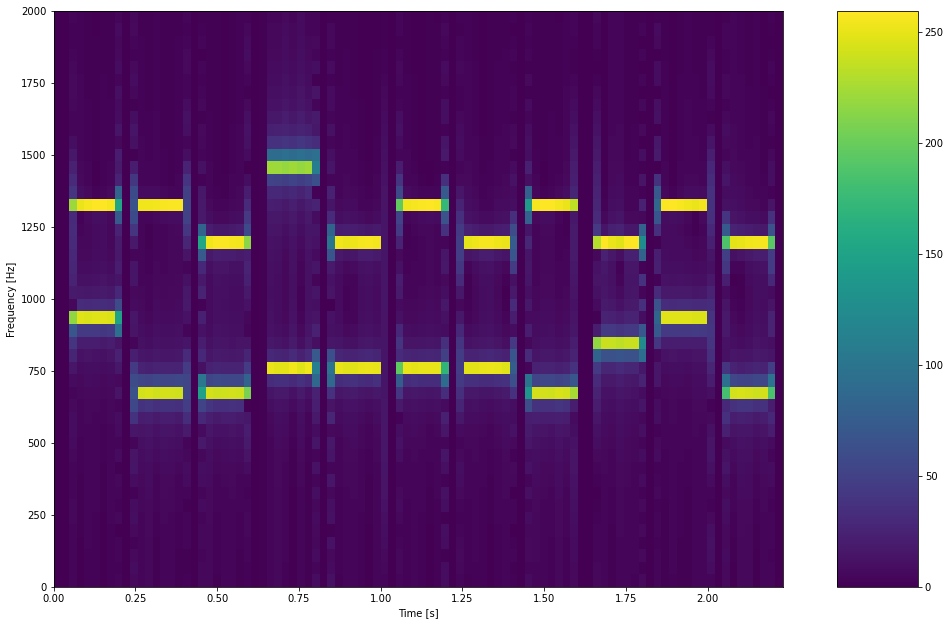

In [14]:
window_size = 1024
x_t_reshaped = get_reshaped_signal(data, window_size=window_size)
X_jw = get_X_jw(x_t_reshaped, window_size=window_size)
plot_spectrongram(X_jw, window_size=window_size)

### 4.2. Window's size = 2048

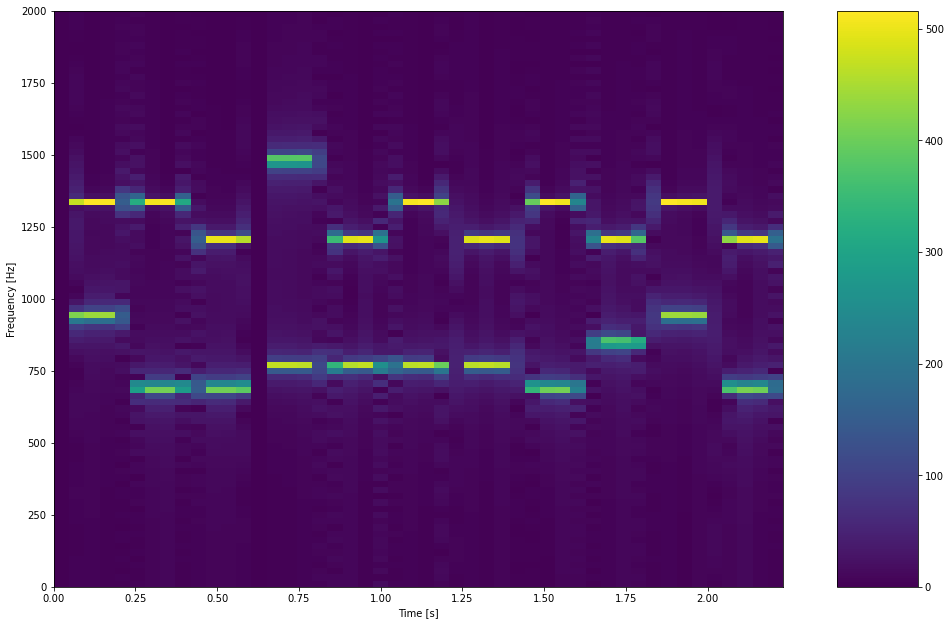

In [15]:
window_size = 2048
x_t_reshaped = get_reshaped_signal(data, window_size=window_size)
X_jw = get_X_jw(x_t_reshaped, window_size=window_size)
plot_spectrongram(X_jw, window_size=window_size)

### 4.3. Window's size = 4096

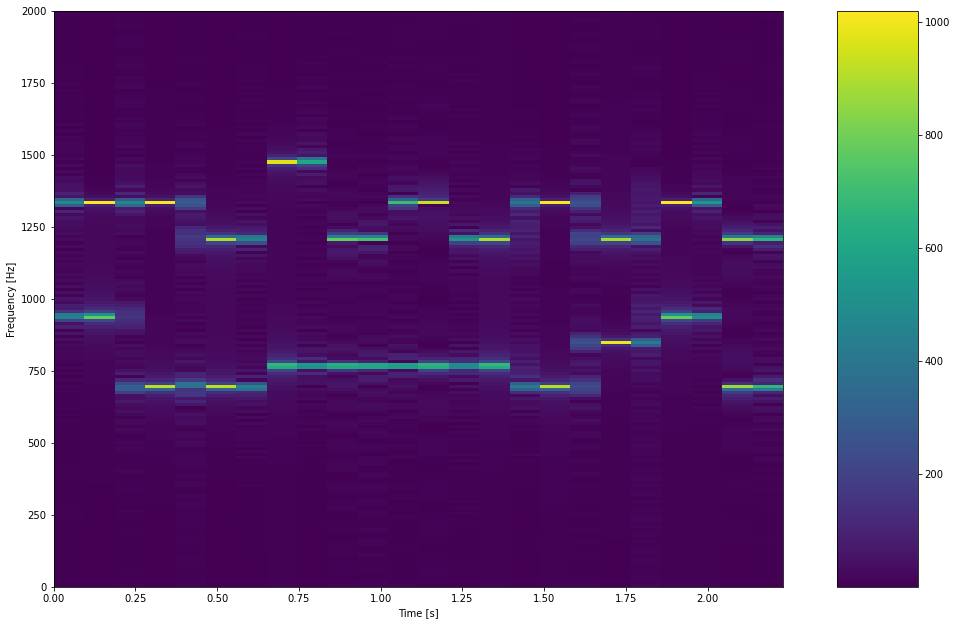

In [16]:
window_size = 4096
x_t_reshaped = get_reshaped_signal(data, window_size=window_size)
X_jw = get_X_jw(x_t_reshaped, window_size=window_size)
plot_spectrongram(X_jw, window_size=window_size)

## Conclusion

### 1. Pressed keys in order from the first window to the last based on the above diagrams
0, 2, 1, 6, 4, 5, 4, 2, 7, 0, 1 

### 2. What happens when we increase the size of the windows? 

When we increase the size of the windows, the number of samples of the audio signal will decrease
and then as the number of samples decreases, the precision of the frequencies calculated in each sample will also decrease.